In [122]:
import numpy as np
from scipy.stats import norm, bernoulli, fit
import seaborn as sns
from matplotlib.pyplot import vlines, show

In [123]:
seed = 42
np.random.seed(seed)

norm_rv = norm(2, 1)
ber_rv = bernoulli(0.75)

# MLE

## Функция правдоподобия

Если вкратце, то это просто произведение вероятностей / плотностей выборки при параметре $\theta$

$L(x_1, \ldots, x_n; \theta) = \prod \limits^{n}_{i = 1} p(x_i; \theta)$

Для непрерывных всё то же самое, только для плотности

In [124]:
n = 100

norm_rvs = norm_rv.rvs(size=n)
ber_rvs = ber_rv.rvs(size=n)
# norm_rvs

### Ручное исполнение

In [125]:
np.prod(norm(0, 1).pdf(norm_rvs)), np.prod(bernoulli(0.5).pmf(ber_rvs))  # Взял случайные параметры распределения

(1.9381000007367617e-136, 7.888609052210153e-31)

Сам метод MLE заключается в подборке такого параметра $\theta$, чтобы результат был максимальным.

Записывается это так: $\hat \theta=\operatorname{argmax}\limits_{\theta\in\Theta} L(x_i, \theta)$

### Исполнение через scipy

Вообще, тут сразу ищутся нужные параметры.

FitParams(loc=1.8961532745465295, scale=0.9036160876688721) FitParams(p=0.7999999931492221, loc=0.0)


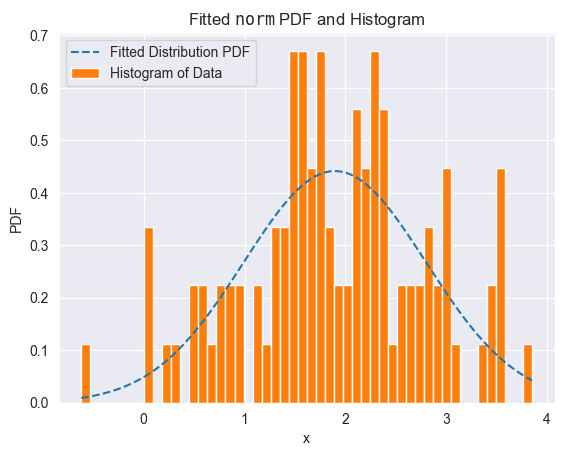

In [131]:
res_fit_norm = fit(norm, norm_rvs, [(-3, 3), (-3, 3)])  # Нужно выставлять свои пределы.
# res_fit_norm = norm.fit(norm_rvs)  # Границы параметров выставлены автоматически
res_fit_bern = fit(bernoulli, ber_rvs)
print(res_fit_norm.params, res_fit_bern.params)
res_fit_norm.plot()
# res_fit_bern.plot()
show()

# Информация Фишера

(1.8961534826059059, 0.9036161766446296)